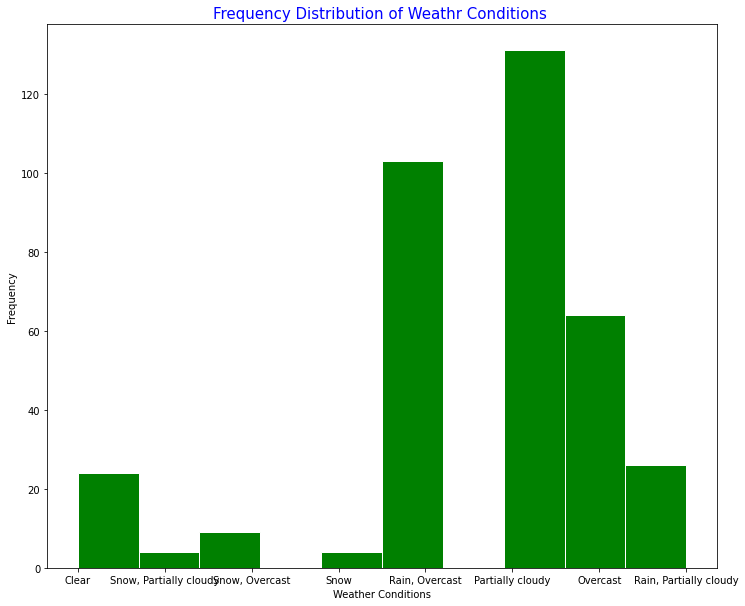

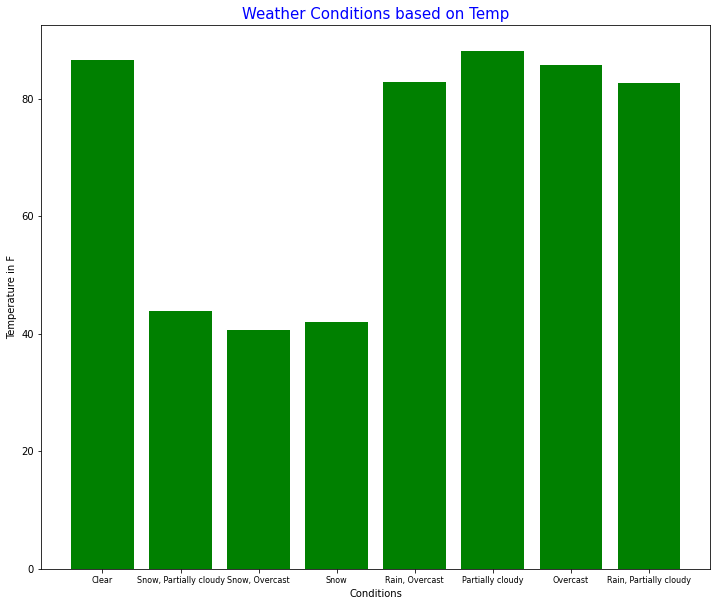

In [192]:
#to work with dataframe
import pandas as pd
#to perform numerical operations
import numpy as np
# import request for URL
import requests
#to visualize data
import seaborn as sns
#Import IO
import io
# to visualize data
import matplotlib.pyplot as plt 
# to partition the data
from sklearn.model_selection import train_test_split
# importing library for logistic regression
from sklearn.linear_model import LogisticRegression
# importing performance metrices - accuracy score & confusion
from sklearn.metrics import accuracy_score,confusion_matrix


weather_data = pd.read_csv("https://github.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/raw/main/Weather_Data-2018.csv",index_col=0,error_bad_lines=False)

# creating a copy of orignal data 
data = weather_data.copy()

#check datatype
#data.info()

#to change the date type of columns 
data['Date time'] = data['Date time'].astype('datetime64')

#check null values 
data.isnull().sum()

# all columns having missing values 
miss_columns = ['Wind Chill','Heat Index','Wind Gust']

# Wind Chill             183
# Heat Index             238
# Wind Gust              142

# row havings atlest one missing value 
missing = data[data.isnull().any(axis=1)]

# to see the coorelation among columns
data.corr()

# summary of categorial vaiables
data_test.describe(include='O')

# Conditions
# count	365
# unique	8
# top	Partially cloudy
# freq	131


# grouping data based on date for columns having missing values 
# freq = D - Daily
# freq = M - Monthly 
# freq = Y - Yearly 
# freq = Q - Quaterly
data.set_index('Date time').groupby(pd.Grouper(freq='M'))[miss_columns].mean()

# creating copy of to replace Nan values with 0
data_test = data.copy()

#Coulumns name of data_test
data_test.columns
# ['Date time', 'Maximum Temperature', 'Minimum Temperature',
#        'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Snow',
#        'Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
#        'Cloud Cover', 'Relative Humidity', 'Conditions']

# replacing Nan values with 0 for columns having Nan/blank values
data_test['Wind Chill'].replace(np.nan, 0.0, inplace=True) 
data_test['Heat Index'].replace(np.nan, 0.0, inplace=True)
data_test['Wind Gust'].replace(np.nan, 0.0, inplace=True)

#summary of categorial vaiables
data_test.describe(include='O')

# unique values of weather condition conditions 

data_test['Conditions'].unique()

# ['Clear', 'Snow, Partially cloudy', 'Snow, Overcast', 'Snow',
#        'Rain, Overcast', 'Partially cloudy', 'Overcast',
#        'Rain, Partially cloudy']

data_test['Conditions'].str.contains('Rain').mean()
data_test['Conditions'][data_test['Conditions'].str.contains('Rain')]

# group by weather conditions and calculate the mean
data_test.groupby('Conditions').mean()

#group by weather conditions and count the number of records for each category
data_test.groupby('Conditions', as_index = False)['Temperature'].count()

# 	Conditions	Temperature
# 0	Clear	24
# 1	Overcast	64
# 2	Partially cloudy	131
# 3	Rain, Overcast	103
# 4	Rain, Partially cloudy	26
# 5	Snow	4
# 6	Snow, Overcast	9
# 7	Snow, Partially cloudy	4

# histogram for weather conditions 

fig = plt.figure(figsize=(12,10))
plt.hist(data_test['Conditions'], color = 'green',edgecolor = 'white')
plt.title('Frequency Distribution of Weathr Conditions ', color = 'Blue', size = 15)
plt.xlabel('Weather Conditions', size= 10)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Frequency')
plt.show()

fig = plt.figure(figsize=(12,10))
plt.bar(data_test['Conditions'],data_test['Temperature'],color='green')
plt.title('Weather Conditions based on Temp', color = 'Blue', size = 15)
plt.xlabel('Conditions', size= 10)
plt.tick_params(axis='x', labelsize=8)
plt.ylabel('Temperature in F')
plt.show()

In [196]:
data_test.to_csv('Weather_Cleaned_Data.csv',index=False)